# 从零开始实现K_Means算法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

随机生成一些数据

In [2]:
# 先在四个中心点附近产生一堆数据
real_center = [(1, 1), (1, 2), (2, 2), (2, 1)]
point_number = 50

points_x = []
points_y = []

for center in real_center:
    offset_x, offset_y = np.random.randn(point_number) * 0.3, np.random.randn(point_number) * 0.25
    x_val, y_val = center[0] + offset_x, center[1] + offset_y

    points_x.append(x_val)
    points_y.append(y_val)

points_x = np.concatenate(points_x)
points_y = np.concatenate(points_y)

我们以 (1, 1), (1, 2), (2, 2), (2, 1) 四个点为中心产生了随机分布的点，如果我们的聚类算法正确的话，我们找到的中心点应该和这四个点很接近。先用简单的语言描述 kmeans 算法步骤：

第一步 - 随机选择 K 个点作为点的聚类中心，这表示我们要将数据分为 K 类。
第二步 - 遍历所有的点 P, 算出 P 到每个聚类中心的距离，将 P 放到最近的聚类中心的点集中。遍历结束后我们将得到 K 个点集。
第三步 - 遍历每一个点集，算出每一个点集的中心位置，将其作为新的聚类中心。
第四步 - 重复步骤 2 和步骤 3，直到聚类中心位置不再移动。


设置参数

In [3]:
K = 4
p_list = np.stack([points_x, points_y], axis=1)
index = np.random.choice(len(p_list), size=K)  # 随机选取中心点
centeroid = p_list[index]


第二步是计算每一个点和聚类中心的距离，然后将点放入最近的聚类中心的集合中。

In [4]:
points_set = {key: [] for key in range(K)}

for p in p_list:
    nearest_index = np.argmin(np.sum((centeroid - p) ** 2, axis=1) ** 0.5)
    points_set[nearest_index].append(p)

第三步，遍历每一个点集，计算新的聚类中心

In [5]:
for k_index, p_set in points_set.items():
    p_xs = [p[0] for p in p_set]
    p_ys = [p[1] for p in p_set]
    centeroid[k_index, 0] = sum(p_xs) / len(p_set)
    centeroid[k_index, 1] = sum(p_ys) / len(p_set)

第四步，重复进行以上步骤，我们迭代epoch次，观察一下聚类中心位置的变化：

In [6]:
epoch = 10
for i in range(epoch):
    points_set = {key: [] for key in range(K)}

    for p in p_list:
        nearest_index = np.argmin(np.sum((centeroid - p) ** 2, axis=1) ** 0.5)
        points_set[nearest_index].append(p)

    for k_index, p_set in points_set.items():
        p_xs = [p[0] for p in p_set]
        p_ys = [p[1] for p in p_set]
        centeroid[k_index, 0] = sum(p_xs) / len(p_set)
        centeroid[k_index, 1] = sum(p_ys) / len(p_set)
print(centeroid)


[[1.018566   0.92289767]
 [1.99091619 0.99461627]
 [1.00965273 1.91978773]
 [2.06349812 1.99903516]]


## 寻找最优K值
> 相关理论请见[博客](https://blog.csdn.net/Garyboyboy/article/details/121865540)

使用 sklearn 库中的 KMeans 方法来跑一下聚类过程，然后将到聚类中心的平均值变化作图。

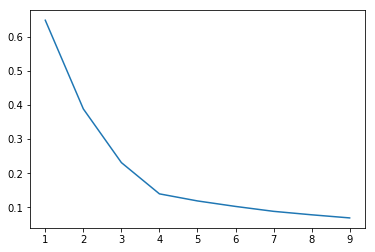

In [7]:
from sklearn.cluster import KMeans

loss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=100).fit(p_list)
    loss.append(kmeans.inertia_ / point_number / K)

plt.plot(range(1, 10), loss)
plt.show()